# **Importing Libraries**

In [15]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import tensorflow as tf

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [17]:
# Import MNIST dataset
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [18]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [19]:
##Scaling

train_x = train_x/255.0
test_x = test_x/255.0

In [20]:
train_y[5]

2

In [21]:
## Let's show some Hand written Digits

digits = train_x[300]
digits_image = digits.reshape(28,28) 

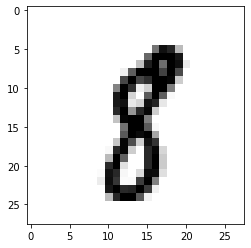

In [22]:
import matplotlib
plt.imshow(digits_image, cmap=matplotlib.cm.binary, interpolation='nearest')

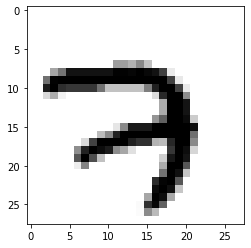

In [23]:

digits_2 = train_x[5000]
digits_image_2 = digits_2.reshape(28,28) 
plt.imshow(digits_image_2, cmap=matplotlib.cm.binary, interpolation='nearest')

# **Build the CNN Model**

In [24]:
from keras.layers.pooling import MaxPooling1D
model = Sequential()
#Input and first hidden  layer
model.add(Conv2D(64,(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))


#second hidden layer

model.add(Conv2D(128,(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

#third hidden layer
model.add(Conv2D(256,(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))


#Flattening
model.add(Flatten())

# Dense layer
model.add(Dense(64,activation="relu"))

#output layer with 10 output classes
model.add(Dense(10, activation="softmax"))

# **Compile the CNN Model**

In [25]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# **Execute the Model**

In [27]:
history = model.fit(train_x,train_y, epochs=10, validation_split=0.25)
model.save("mnist.h5")

Epoch 1/10
1407/1407 [==============================] - 197s 140ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0425 - val_accuracy: 0.9889
Epoch 2/10
1407/1407 [==============================] - 195s 139ms/step - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.0388 - val_accuracy: 0.9885
Epoch 3/10
1407/1407 [==============================] - 196s 139ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0455 - val_accuracy: 0.9879
Epoch 4/10
1407/1407 [==============================] - 169s 120ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0420 - val_accuracy: 0.9894
Epoch 5/10
1407/1407 [==============================] - 153s 109ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0514 - val_accuracy: 0.9879
Epoch 6/10
1407/1407 [==============================] - 152s 108ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0547 - val_accuracy: 0.9859
Epoch 7/10
1407/1407 [==============================] - 149s 106ms/step - loss: 0.0210 - accuracy: 0.9933 - val_

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

# **Plot the Train and Validation Accuracy vs the number of epochs**

Text(0.5, 1.0, 'Accuracy VS Epochs')

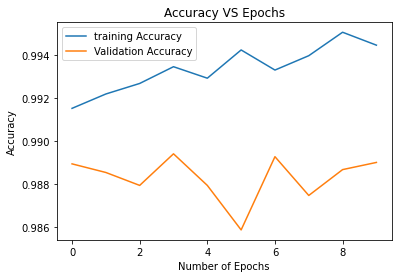

In [29]:
plt.plot(history.history["accuracy"], label="training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy VS Epochs")

# **Plot the train and Validation Loss vs the number of epochs**

Text(0.5, 1.0, 'Loss VS Epochs')

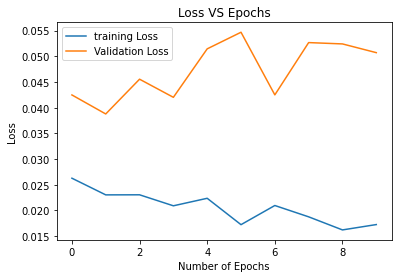

In [30]:
plt.plot(history.history["loss"], label="training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss VS Epochs")

## **Evaluate the Test Accuracy**

In [31]:
y_pred = model.predict(test_x)
y_pred[1]

array([1.7888435e-06, 2.6338179e-07, 9.9999702e-01, 2.4978425e-07,
       6.4373279e-10, 3.1391106e-10, 7.1082674e-08, 1.4302842e-07,
       3.6901389e-09, 4.0035650e-07], dtype=float32)

In [32]:
np.argmax(y_pred[1])

2

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
test_y[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# **Confusion Matrix**

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y,y_predicted_labels)
cm

array([[ 974,    1,    0,    0,    1,    0,    2,    2,    0,    0],
       [   0, 1132,    0,    0,    1,    0,    1,    1,    0,    0],
       [   1,    1, 1010,    1,    2,    0,    4,   13,    0,    0],
       [   0,    0,    1,  998,    0,    6,    0,    3,    1,    1],
       [   0,    0,    0,    0,  977,    0,    0,    0,    0,    5],
       [   3,    2,    0,    2,    0,  882,    2,    1,    0,    0],
       [   1,    2,    0,    0,    1,    2,  952,    0,    0,    0],
       [   1,    3,    3,    0,    0,    1,    0, 1015,    1,    4],
       [   1,    0,    1,    0,    2,    1,    0,    0,  967,    2],
       [   0,    0,    0,    0,    5,    2,    1,    0,    1, 1000]])

Text(187.80000000000013, 0.5, 'Actual')

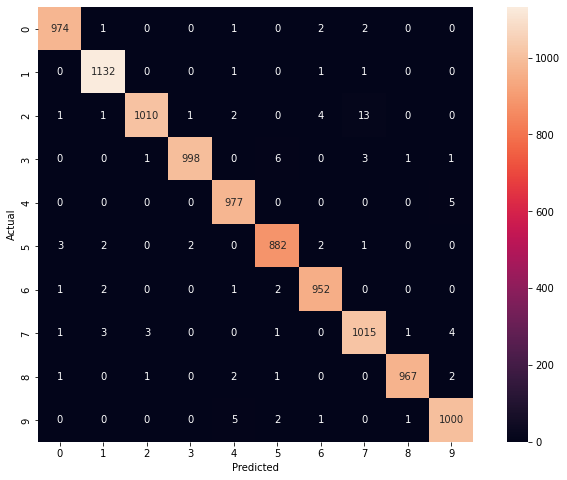

In [41]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [45]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 7s 21ms/step - loss: 0.0437 - accuracy: 0.9907


[0.04368983209133148, 0.9907000064849854]